<a href="https://colab.research.google.com/github/MisterGusMan/Alura_ImersaoDados3/blob/main/An%C3%A1lise_Aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Na aula 3, estaremos analisando correlações, causalidade e relações entre genes no nosso experimento.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

df = pd.read_csv(url_dados, compression = 'zip')
df.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [3]:
df.rename(columns={'droga':'composto'}, inplace=True)
df.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'composto', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

Ao estudar as relações entre as diferentes colunas, podemos visualizar suas correlações com uma tabela de frequência, ou, no caso de dados contínuos, um gráfico de dispersão ou um mapa de calor.

In [4]:
pd.crosstab([df['dose'], df['tempo']],  df['tratamento'], normalize= 'index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

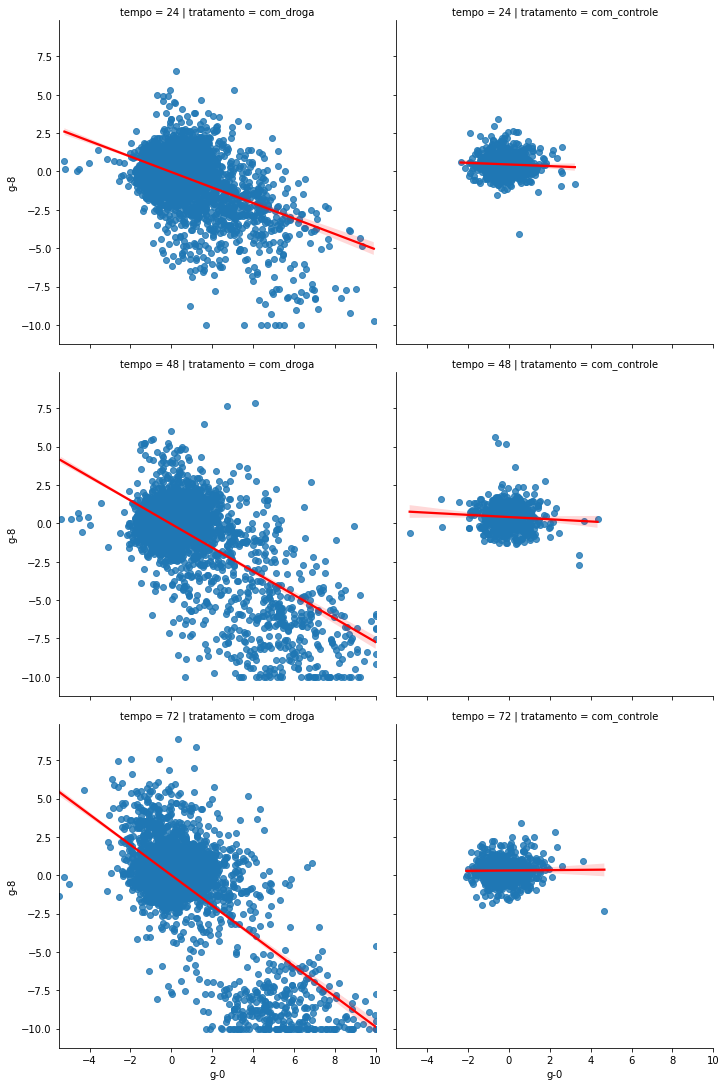

In [5]:
sns.lmplot(data=df, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento', row='tempo')

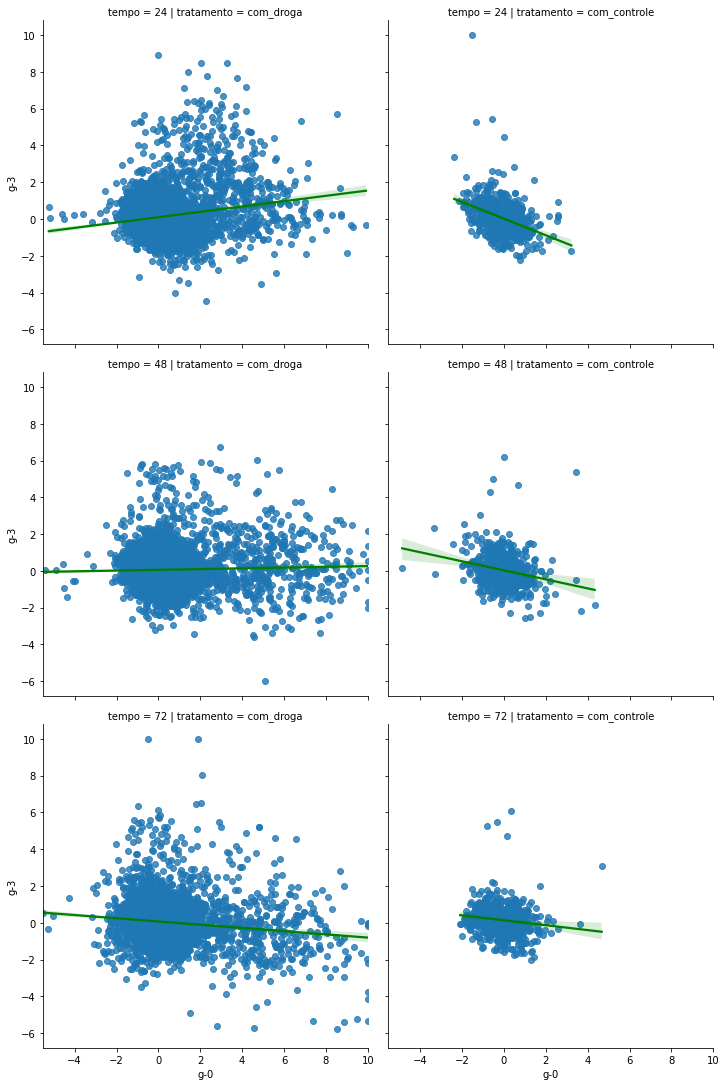

In [6]:
sns.lmplot(data=df, x='g-0', y='g-3', line_kws={'color': 'green'}, col='tratamento', row='tempo')

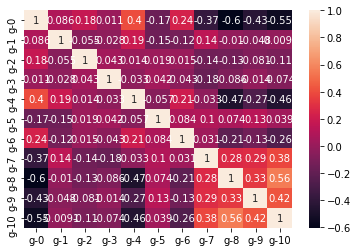

In [7]:
sns.heatmap(df.loc[:,'g-0':'g-10'].corr(), annot = True)

Após introduzir estes novos métodos, podemos responder as perguntas.

#Desafio 01: Criar tabelas de frequência com pandas.groupby()

Da documentação https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html :

```
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=<object object>, observed=False, dropna=True)

Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.
```
Desta forma, podemos agrupar os diferentes valores utilizando uma série em comum.


In [8]:
# Tabela 1 (contagem dos valores dose x tempo)
t1 = df.groupby(by=['dose'])['tempo'].value_counts()
t1.unstack()

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [9]:
# Tabela 2 (contagem dos valores dose e tempo x tratamento)
t2 = df.groupby(by=['dose','tempo'])['tratamento'].value_counts()
t2.unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [10]:
# Tabela 3 (contagem relativa dos valores da dose e tempo x tratamento)
t3 = df.groupby(by=['dose','tempo'])['tratamento'].value_counts(normalize = True)
t3.unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [11]:
# Tabela 4 (média dos valores do gene g-0 agrupado por dose, tempo e tratamento)
t4 = df.groupby(by=['dose','tempo','tratamento'])['g-0'].mean()
t4.unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

#Desafio 02: Normalizar o crosstab pela coluna.

Bem simples: Ao invés de normalizar pelo index, usamos `normalize='columns'` para normalizar pela coluna.

In [12]:
pd.crosstab([df['dose'], df['tempo']],  df['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

#Desafio 03: Explorar outros agregadores.

Existem ao todo 14 funções agregadoras disponíveis na biblioteca pandas:

* mean(): Média;
* median(): Mediana;
* sum(): Soma;
* size(): Tamanho;
* count(): Contagem;
* std(): Desvio Padrão;
* var(): Variância;
* sem(): Erro padrão da média;
* describe(): Descrição;
* first(): Primeiro
* last(): Último
* nth() : Valor n, ou subset se n for uma lista;
* min(): Mínimo;
* max(): Máximo;




In [13]:
df.groupby(by=['dose','tempo','tratamento'])['g-0'].std().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

#Desafio 04: Explorar o melt.

Da documentação https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html: 

```
pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)

Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.
```
Basicamente: o método melt muda o formato de um DataFrame, tranformando colunas em linhas e mantendo os identificadores.


In [14]:
df[['dose','tempo','tratamento','g-0']].head()

,dose,tempo,tratamento,g-0
0,D1,24,com_droga,1.0620
1,D1,72,com_droga,0.0743
2,D1,48,com_droga,0.6280
3,D1,48,com_droga,-0.5138
4,D2,72,com_droga,-0.3254


In [15]:
pd.melt(df,id_vars=['dose','tempo','tratamento'],value_vars=['g-0']).head()

,dose,tempo,tratamento,variable,value
0,D1,24,com_droga,g-0,1.0620
1,D1,72,com_droga,g-0,0.0743
2,D1,48,com_droga,g-0,0.6280
3,D1,48,com_droga,g-0,-0.5138
4,D2,72,com_droga,g-0,-0.3254


#Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos. 

Vamos começar separando os genes e células do DataFrame e criando uma tabela com estes valores:

In [16]:
g = df[df['tratamento'] == 'com_droga'].loc[:,'g-0':'g-49']
c = df[df['tratamento'] == 'com_droga'].loc[:,'c-0':'c-49']
t = pd.concat([g,c],axis=1) 
t

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,...,0.9084,0.6857,1.0620,0.7602,-0.1048,0.3594,0.6376,-0.2798,-0.4010,0.6842,1.1560,0.3522,-0.3971,-0.2115,-0.2687,0.5196,0.1594,0.8920,0.6485,0.6078,0.3799,-0.1727,0.3817,0.3600,0.5124,-0.1414,0.6159,0.4689,-0.0773,0.4728,-0.0143,-0.5344,0.3578,0.3248,0.8903,0.3431,1.0340,1.3070,-1.0230,0.7709
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,...,0.7787,0.2074,1.1110,0.2433,0.2010,0.7094,-0.4210,-0.2274,0.4045,0.1138,0.9950,0.0087,0.4864,-0.0140,0.0164,0.1759,0.6654,0.3556,0.8175,0.0474,0.5589,0.4481,0.1888,0.3712,0.7837,0.6860,0.4123,0.1560,-0.1203,-1.2780,0.6743,0.7358,0.1334,-0.5193,0.2281,0.0158,-0.5658,0.6065,0.6259,0.4716
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,...,0.3084,-0.0899,-0.0397,-0.5077,-0.5072,0.0100,-0.6915,0.0643,-0.8927,-0.2048,0.0773,0.5971,-0.1602,-0.2028,-0.2216,-1.1380,0.3668,-1.0620,-0.7736,0.6225,0.6274,-0.3038,0.1171,-0.0550,-0.0289,1.1740,-0.7937,-1.0610,-0.6409,0.3884,-1.0330,-0.0055,0.1212,-0.7020,-0.7065,-0.5192,-0.3181,0.1787,0.3354,0.1349
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,...,-2.2730,-4.6920,-1.2750,-1.4970,-0.0156,-1.9350,-1.3430,-0.5252,-2.7210,-0.2524,0.9197,-3.1220,-1.9180,-0.6761,-2.8360,-1.6890,-4.4990,-1.5190,-2.2730,-0.3250,0.1895,-2.4220,0.0670,-1.9870,-0.6482,-0.0023,-1.9930,-0.8042,-3.6160,-0.3487,-1.2560,-2.7220,-2.1970,-2.9030,-1.1030,-2.3020,-2.0030,-1.3390,-3.0160,-3.0040
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,...,0.9642,-0.0853,0.1559,0.1419,0.1197,0.6774,0.1332,-0.5176,0.1232,0.0827,0.6995,0.5953,1.0600,-0.4255,0.8624,1.0010,0.0840,-0.6553,-0.1093,0.0587,0.5490,0.6331,0.5227,0.2186,0.2781,0.8947,-0.0202,0.5966,0.2249,0.5671,0.6382,-0.3909,0.7040,0.1462,0.0655,-0.5605,0.5903,-0.2353,-0.1285,-0.1740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,-0.5037,-0.5939,0.4825,-0.5187,0.1618,-0.2253,0.3153,0.4839,0.0520,1.3850,0.6502,-0.4198,0.272

In [17]:
corr = t.corr()
corr

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49
g-0,1.000000,0.071546,0.176710,0.023815,0.410954,-0.170003,0.257568,-0.406262,-0.614090,-0.437885,-0.566067,0.221179,-0.209361,0.488840,-0.358997,-0.200232,-0.523170,-0.443493,-0.000410,-0.085089,-0.472862,0.038699,0.016291,-0.088633,-0.353608,-0.238430,-0.428393,0.151791,-0.484860,-0.308278,-0.540069,0.575238,-0.151090,-0.148153,-0.128371,0.336791,-0.153650,-0.598671,0.616227,0.461049,...,-0.631267,-0.639009,-0.638204,-0.649221,-0.631769,-0.654796,-0.647906,-0.685883,-0.602646,-0.652285,-0.692599,-0.638388,-0.551494,-0.589398,-0.667832,-0.613271,-0.626699,-0.669674,-0.656304,-0.623334,-0.661569,-0.667790,-0.654234,-0.663180,-0.657777,-0.649266,-0.613794,-0.574442,-0.635751,-0.653988,-0.625254,-0.653620,-0.662391,-0.627147,-0.662955,-0.659771,-0.610167,-0.660685,-0.603942,-0.617839
g-1,0.071546,1.000000,-0.050010,-0.011016,0.164478,-0.144854,-0.115735,0.128779,-0.002324,-0.041429,-0.001983,0.161415,0.044962,-0.006111,0.009942,-0.072744,-0.059215,0.006892,-0.023821,-0.037649,-0.107562,0.178893,-0.073339,0.088869,-0.016528,-0.018288,-0.003705,0.010195,-0.090239,-0.087303,-0.045608,-0.045241,0.179629,-0.085679,0.047933,0.026557,-0.073354,0.009270,-0.046251,0.034999,...,-0.000406,-0.018677,-0.009377,-0.026069,-0.008973,0.012306,-0.012649,-0.016771,0.004802,0.005705,-0.001482,-0.005209,0.064228,0.024969,-0.005086,0.030136,-0.010881,-0.011836,-0.018977,-0.007342,0.002220,-0.028096,-0.012174,-0.004820,0.017972,0.000671,-0.024020,-0.029830,-0.018491,0.008753,-0.024750,-0.003445,0.015599,-0.020082,-0.003708,-0.000775,-0.007487,0.009141,0.003686,0.035052
g-2,0.176710,-0.050010,1.000000,0.040901,0.025538,0.014120,0.020787,-0.153612,-0.130559,-0.085536,-0.114650,0.011606,-0.063864,0.087185,-0.089409,-0.060799,-0.139968,-0.088768,0.046446,0.030037,-0.068204,-0.130767,-0.013376,-0.036385,-0.133718,-0.070799,-0.126588,0.032480,-0.134140,-0.025407,-0.159548,0.172952,-0.099526,-0.027519,-0.021312,0.008755,-0.027444,-0.159744,0.172619,0.144790,...,-0.183782,-0.179848,-0.184618,-0.186750,-0.179063,-0.186363,-0.166349,-0.182311,-0.172443,-0.175079,-0.187206,-0.175657,-0.139594,-0.196196,-0.174218,-0.174531,-0.183952,-0.187791,-0.165804,-0.169211,-0.182060,-0.189801,-0.188333,-0.192037,-0.178599,-0.192573,-0.164413,-0.164059,-0.185017,-0.187677,-0.183443,-0.179047,-0.197008,-0.169533,-0.191062,-0.181752,-0.170008,-0.177350,-0.163114,-0.171502
g-3,0.023815,-0.011016,0.040901,1.000000,-0.018447,0.045729,-0.033596,-0.172864,-0.091251,-0.021091,-0.089094,0.191058,0.025939,0.200727,0.124575,-0.060579,0.030569,-0.076094,0.237965,0.121072,0.018768,-0.155799,0.204079,-0.040606,-0.111889,0.176060,0.102015,-0.005121,-0.031577,-0.138747,-0.054637,0.098129,-0.086426,-0.096574,0.185830,-0.060562,-0.335630,-0.238887,0.084089,0.061662,...,-0.062921,-0.077454,-0.085367,-0.084904,-0.076119,-0.045331,-0.060695,-0.092087,-0.070007,-0.027848,-0.074604,-0.075205,0.071067,-0.004557,-0.064364,-0.008839,-0.116677,-0.072987,-0.090697,-0.040629,-0.061310,-0.103075,-0.044514,-0.097905,-0.046912,-0.051421,-0.082451,-0.035557,-0.106948,-0.030679,-0.089946,-0.049676,-0.070976,-0.072866,-0.067165,-0.078023,-0.034812,-0.073337,-0.062495,-0.036906
g-4,0.410954,0.164478,0.025538,-0.018447,1.000000,-0.061317,0.217751,-0.078081,-0.483885,-0.277567,-0.461466,0.114970,-0.205246,0.230727,-0.313437,0.015216,-0.294585,-0.429069,-0.010755,-0.105519,-0.306332,0.256019,-0.057792,-0.128306,-0.149150,-0.233332,-0.338317,0.082062,-0.360675,-0.236218,-0.409160,0.349982,0.064737,-0.039841,-0.074381,0.202561,-0.114055,-0.282911,0.306875,0.308945,...,-0.389328,-0.395741,-0.392238,-0.397727,-0.409085,-0.392998,

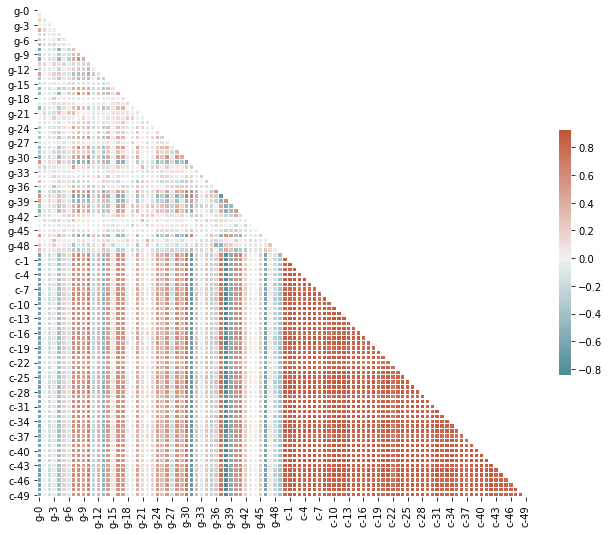

In [18]:
plt.figure(figsize=(11,9))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(210, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5, cbar_kws={"shrink": .5})

A nova matriz de correlação consegue demonstrar algumas coisas interessantes para os genes e células selecionados:

1) Existe genes com uma correlação bem positiva com a viabilidade celular (g-41, por exemplo). No caso da correlação positiva podemos dizer que uma alta expressão desse gene está relacionado de alguma forma com a alta viabilidade celular, já que a correlação diz que ambos os valores tendem a mudar na mesma direção.

2) Existem genes que possuem uma correlação bastante negativa com vários tipos de células (g-46, por exemplo). Isso quer dizer que seus valores mudam em direções opostos. Entretanto, somente pelo valor da correlação, não podemos dizer se o aumento da expressão do gene indica redução da viabilidade celular ou vice-versa. Porém, isso pode ser visto pelo lmplot (demonstrado na linha de código abaixo).

3) Ambos os casos acima nós ajudam a resaltar genes que podem ser de interesse ter um estudo mais aprofundado.

4) muitos genes demonstram praticamente nenhuma correlação com as viabilidade celular. Isso pode demonstrar que esse genes não estão envolvidos diretamente em via metabólicas que irão resultar na sobrevivem ou morte da célula em questão sobre o efeito dos compostos testados, e podem não ser de interesse continuar analisando-os nas próximas etapas do estudos.

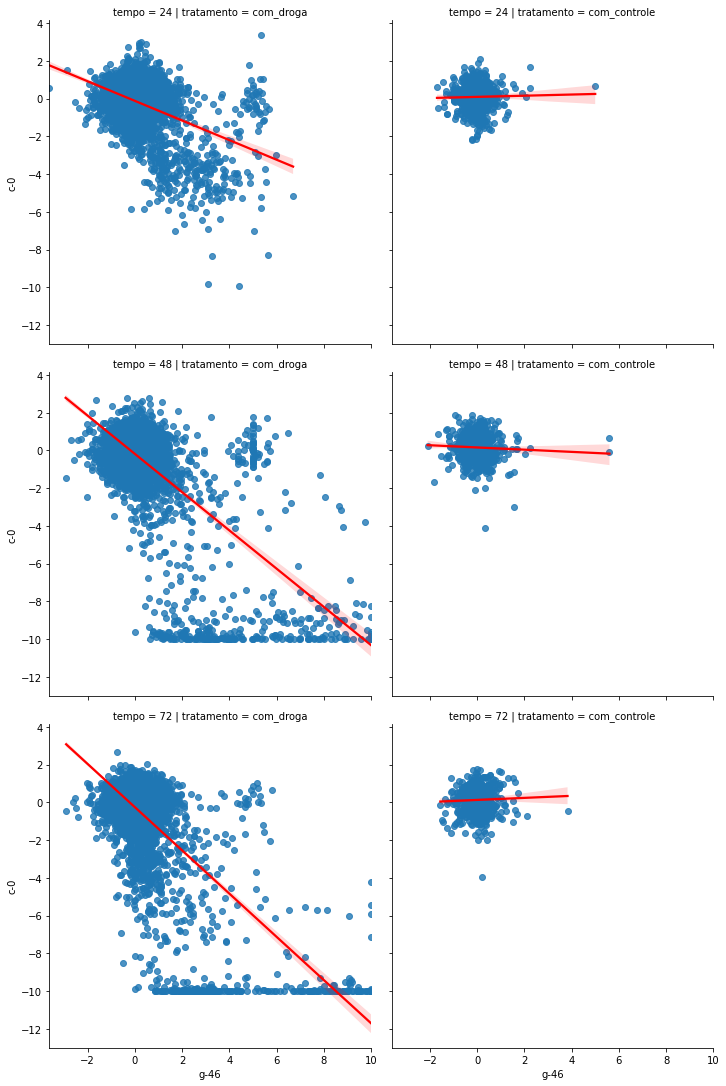

In [19]:
sns.lmplot(data=df, x='g-46', y='c-0', line_kws={'color': 'red'}, col='tratamento',row='tempo')

#Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

Realizado no desafio anterior.

#Desafio 07: Resumo do que você aprendeu com os dados

Nessa aula, cotinuamos nós aprofundado em como tirar insights que vão ajudar e guiar as etapas seguintes do estudo sendo realizado. Começamos a enxergar como que certos compostos interferem na expressão de um gene e como isso está relacionado com a viabilidade celular de diferentes tipos de células.